In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../sivigila_intsuicidio.csv", low_memory=False)

# Exploración de factores generales (edad, sexo, intentos previos)

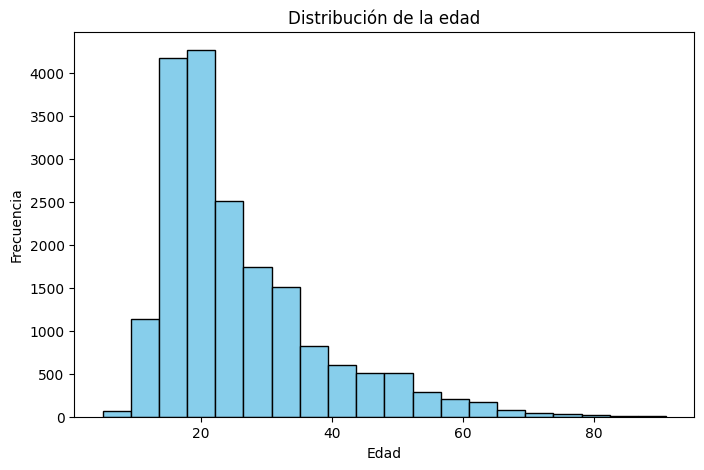

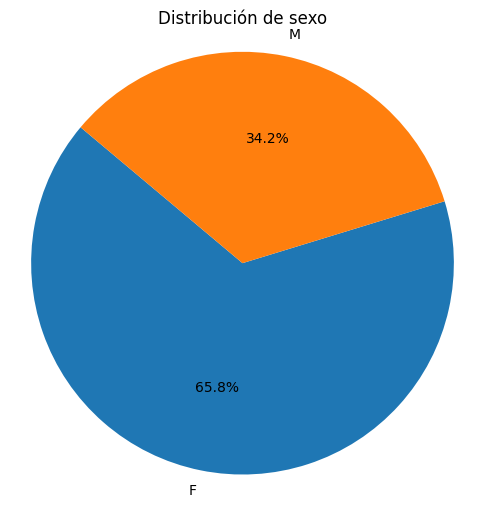

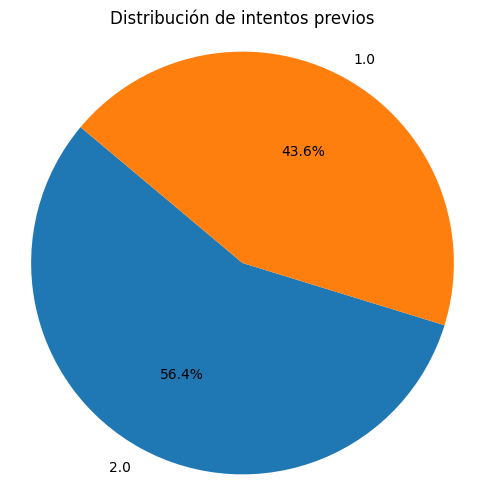

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(df['edad_'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la edad')
plt.show()

frecuencia_sexo = df['sexo_'].value_counts(dropna=True)

plt.figure(figsize=(6, 6))
plt.pie(
    frecuencia_sexo.values,
    labels=frecuencia_sexo.index.astype(str),
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribución de sexo')
plt.axis('equal')

frecuencia_sexo = df['inten_prev'].value_counts(dropna=True)

plt.figure(figsize=(6, 6))
plt.pie(
    frecuencia_sexo.values,
    labels=frecuencia_sexo.index.astype(str),
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribución de intentos previos')
plt.axis('equal')

plt.show()

# Exploración de factores de riesgo en intentos de suicidio.

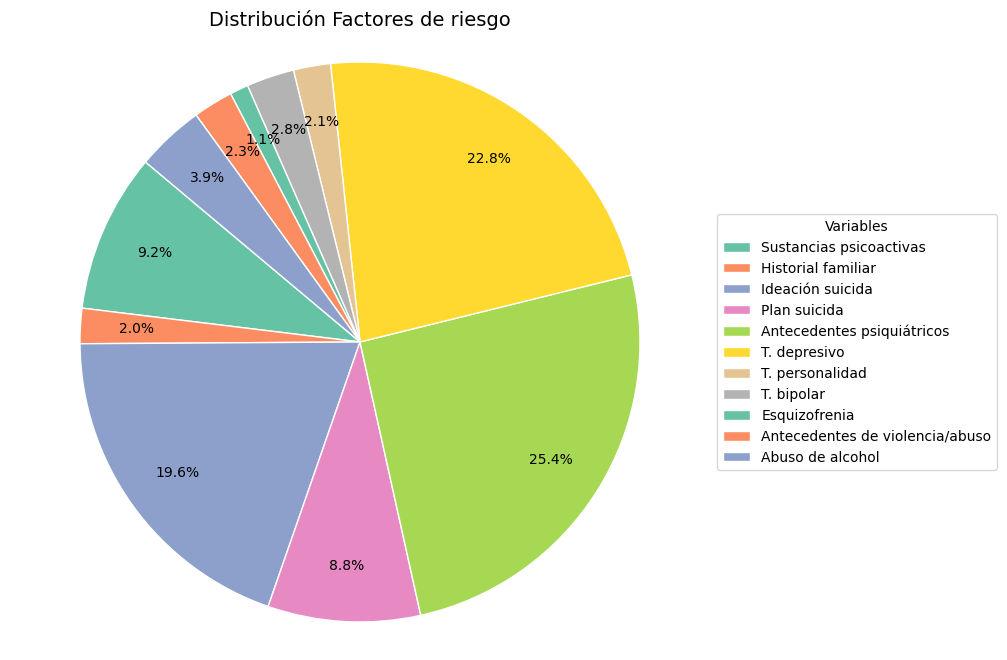

In [14]:
columns_dict = {
    'prob_consu':         'Sustancias psicoactivas',
    'hist_famil':         'Historial familiar',
    'idea_suici':         'Ideación suicida',
    'plan_suici':         'Plan suicida',
    'antec_tran':         'Antecedentes psiquiátricos',
    'tran_depre':         'T. depresivo',
    'trast_personalidad': 'T. personalidad',
    'trast_bipolaridad':  'T. bipolar',
    'esquizofre':         'Esquizofrenia',
    'antec_v_a':          'Antecedentes de violencia/abuso',
    'abuso_alco':         'Abuso de alcohol'
}

labels = []
counts = []
for col, label in columns_dict.items():
    count_1 = (df[col] == 1.0).sum()
    labels.append(label)
    counts.append(count_1)

total = sum(counts)
percentages = [(c / total) * 100 for c in counts] if total > 0 else [0]*len(counts)

plt.figure(figsize=(10, 8))
explode = [0] * len(labels)

colors = sns.color_palette("Set2", len(labels))

patches, texts, autotexts = plt.pie(
    percentages,
    explode=explode,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={"edgecolor": "white"},
    pctdistance=0.8
)

for autotext in autotexts:
    autotext.set_fontsize(10)

plt.title("Distribución Factores de riesgo", fontsize=14)
plt.axis('equal')

for text in texts:
    text.set_visible(False)

plt.legend(
    patches,
    labels,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title="Variables"
)

plt.subplots_adjust(left=0.05, right=0.75)
plt.show()

# Exploración de factores desencadenantes en intentos de suicidio.

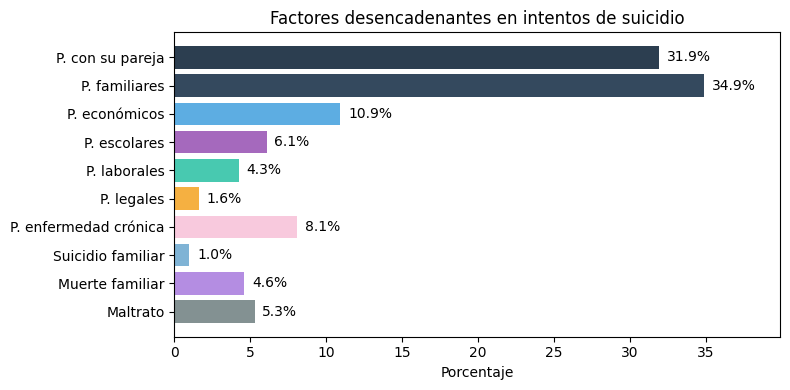

In [15]:
columns = [
    'prob_parej',    # P. con su pareja
    'prob_famil',    # P. familiares
    'prob_econo',    # P. económicos
    'esco_educ',     # P. escolares
    'prob_labor',    # P. laborales
    'prob_legal',     # P. legales
    'enfermedad_cronica', # P. enfermedad crónica,
    'suici_fm_a',     # P. suicidio en familiar,
    'muerte_fam',     # Muerte de familiar
    'maltr_fps'      # M. físico, psicológico o sexual
]

# Etiquetas más descriptivas para el gráfico
labels = [
    'P. con su pareja',
    'P. familiares',
    'P. económicos',
    'P. escolares',
    'P. laborales',
    'P. legales',
    'P. enfermedad crónica',
    'Suicidio familiar',
    'Muerte familiar',
    'Maltrato'
]

subset = df[columns]

percentages = []
for col in columns:
    total_validos = subset[col].notna().sum()  # Conteo de valores no nulos
    conteo_1 = (subset[col] == 1.0).sum()      # Conteo de valores == 1.0
    porcentaje_1 = (conteo_1 / total_validos) * 100 if total_validos > 0 else 0
    percentages.append(porcentaje_1)

plt.figure(figsize=(8, 4))
bars = plt.barh(labels, percentages, color=['#2c3e50', '#34495e', '#5dade2', '#a569bd', '#48c9b0', '#f5b041', '#f8c9dd', '#7FB3D5', '#b48de2', '#839192'])

plt.gca().invert_yaxis()

plt.title("Factores desencadenantes en intentos de suicidio")
plt.xlabel("Porcentaje")

for i, v in enumerate(percentages):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')

max_val = max(percentages) if percentages else 100
plt.xlim(0, max_val + 5)

plt.tight_layout()
plt.show()
